In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import graphlab

#### Problem Statement/Hypothesis: The ability to predict the prices of one's home value is not only beneficial on the individual level, but on a larger economic scale. There are several factors that may influence the price of one's home and value. I believe that there is a direct relationship, and one of the most important factors to consider, between paying a higher price for property when the size of the property being sold is larger. I believe that the larger the Lot Frontage, the width of a lot of property, the higher the selling price of the property.

### Sales Data for Real Estate

In [118]:
data = pd.read_csv('../downloads/traindataforproject.csv')

In [120]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [121]:
data.describe()
#The summary of the numerical values
#Doesn't look like there is any missing data based off of the count row
#73& of of the homes in this data have LotFrontage?? (This might be wrong at there is a value count of 4)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [122]:
data.info()
#The variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [123]:
data['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
        ... 
129.0      2
124.0      2
118.0      2
101.0      2
122.0      2
121.0      2
115.0      2
109.0      2
116.0      2
114.0      2
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, dtype: int64

In [142]:
data.apply(lambda x: sum(x.isnull()),axis=0)
#This shows the number of Null values. For LotFrontage, there are 259 missing values.

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [144]:
#Replace the missing values with the meam
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)

In [145]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [148]:
data['LotFrontage'].fillna('No',inplace=True)

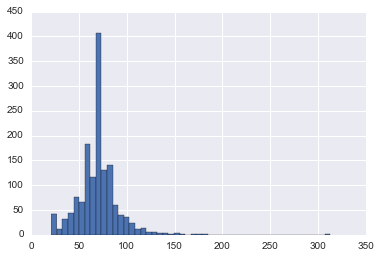

In [155]:
data['LotFrontage'].hist(bins=50)
#Appears to have a positive skew since the data is skewed to the right, with a semi-long tail

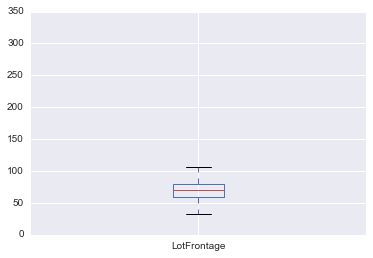

In [156]:
data.boxplot(column='LotFrontage')
#not too many outliers or extreme values possibly because

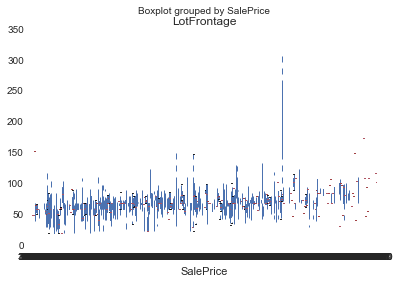

In [157]:
data.boxplot(column='LotFrontage', by = 'SalePrice')
#Boxplot grouped by LotFrontage and SalePrice

In [158]:
#Lets try another variable, homes with 2 floors
data['2ndFlrSF'].value_counts()

0       829
728      10
504       9
672       8
546       8
720       7
600       7
896       6
780       5
862       5
689       5
840       5
756       5
702       4
739       4
551       4
741       4
878       4
804       4
670       3
660       3
1254      3
793       3
668       3
795       3
742       3
832       3
684       3
846       3
807       3
       ... 
811       1
812       1
1097      1
817       1
826       1
828       1
1096      1
830       1
831       1
1093      1
1092      1
1104      1
798       1
1106      1
1121      1
769       1
772       1
776       1
778       1
779       1
1122      1
784       1
796       1
1120      1
787       1
788       1
1116      1
1112      1
1111      1
1872      1
Name: 2ndFlrSF, dtype: int64

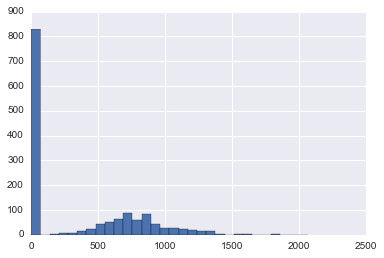

In [159]:
data['2ndFlrSF'].hist(bins=30)

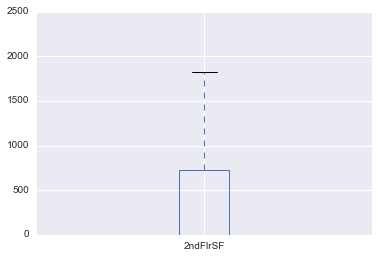

In [160]:
data.boxplot(column='2ndFlrSF')

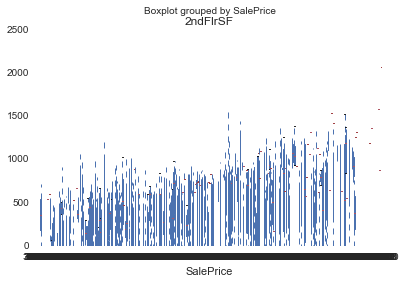

In [132]:
data.boxplot(column='2ndFlrSF', by = 'SalePrice')

In [161]:
temp1 = data['LotFrontage'].value_counts(ascending=True)
temp2 = data.pivot_table(values='SalePrice',index=['LotFrontage'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print 'Frequency Table:' 
print temp1

print '\nFrequency Table:' 
print temp2

Frequency Table:
137.000000      1
138.000000      1
140.000000      1
38.000000       1
106.000000      1
39.000000       1
144.000000      1
128.000000      1
168.000000      1
160.000000      1
152.000000      1
46.000000       1
141.000000      1
153.000000      1
33.000000       1
112.000000      1
149.000000      1
182.000000      1
111.000000      1
150.000000      1
121.000000      2
174.000000      2
124.000000      2
97.000000       2
313.000000      2
122.000000      2
134.000000      2
116.000000      2
109.000000      2
101.000000      2
             ... 
40.000000      12
57.000000      12
82.000000      12
71.000000      12
43.000000      12
59.000000      13
52.000000      14
66.000000      15
74.000000      15
51.000000      15
100.000000     16
72.000000      17
55.000000      17
63.000000      17
79.000000      17
73.000000      18
64.000000      19
24.000000      19
68.000000      19
21.000000      23
90.000000      23
78.000000      25
85.000000      40
65.000000  

## Exploring the data for housing Sales

### This is the relationship between the lot size and price

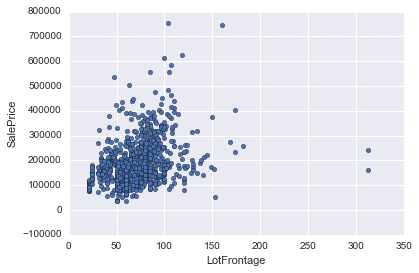

In [26]:
data.plot.scatter(x='LotFrontage', y='SalePrice')

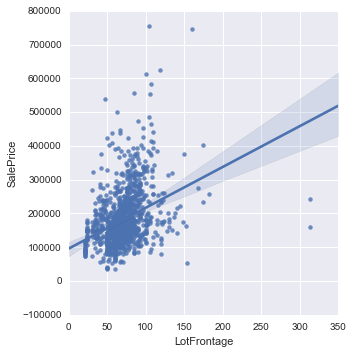

In [27]:
lm = sns.lmplot('LotFrontage','SalePrice', data,sharex=False,sharey=False)

### There is a realtionship that bigger houses cost more. However, most of the data points are closely related demonstrating that a lot of the houses have a lot size between 0 - 150 square feet and have the price range between 250,000 and 300,000 USD. In addition, there are several outliers causing some discrepancies.